# Exploratory Data Analysis (EDA)
## Fake News Detection using NLP

This notebook explores the Fake and Real news datasets to understand:
- Class distribution
- Text length patterns
- Differences between fake and real news articles

The insights here guide feature engineering and model design.


In [6]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

print("Added to path:", PROJECT_ROOT)


Added to path: B:\Training\BIA\Projects\Fakenews_Detection


In [7]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
# Apply settings
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore")

In [9]:
# Load data
from src.preprocessing import load_raw_data

data = load_raw_data()
data.head()

,title,text,subject,date,label
0,More than 60 Rohingya feared drowned as U.S. s...,"COX S BAZAR, Bangladesh/UNITED NATIONS (Reuter...",worldnews,"September 29, 2017",1
1,Two rich Italian regions vote for more autonom...,MILAN (Reuters) - Two wealthy regions of north...,worldnews,"October 22, 2017",1
2,WHOA! Medical Expert Watching Debate Exposes A...,How many more symptoms need to be uncovered be...,left-news,"Sep 27, 2016",0
3,Russia accuses U.S.-led coalition of trying to...,MOSCOW (Reuters) - Russia s ambassador to the ...,worldnews,"November 29, 2017",1
4,Kellyanne Conway’s Husband Just Publicly Bash...,So the Conway marriage just took a turn and ...,News,"June 5, 2017",0


In [10]:
# Data back-up and info
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Class Distribution

In [11]:
# Distribution count
df["label"].value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

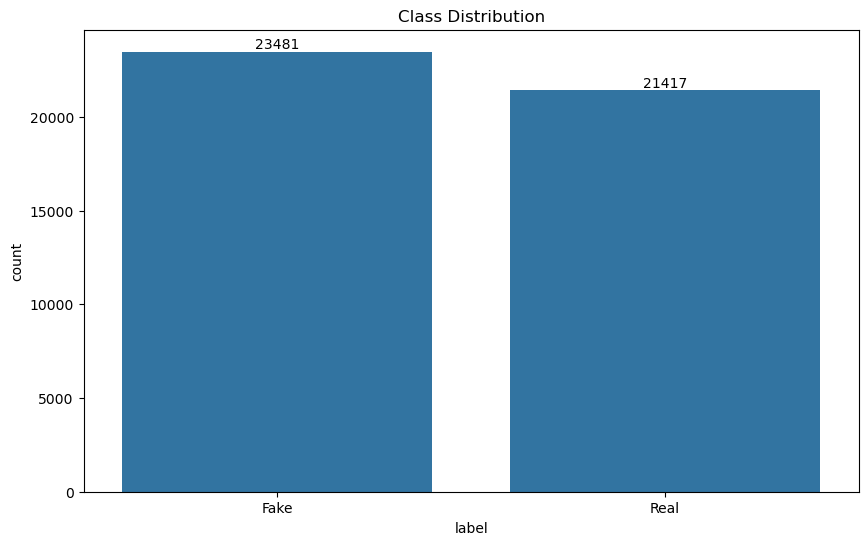

In [13]:
# Visualization of class distribution
plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()

### Text length analysis

In [15]:
# Text length summary
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
df["text_length"].describe()


count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text_length, dtype: float64

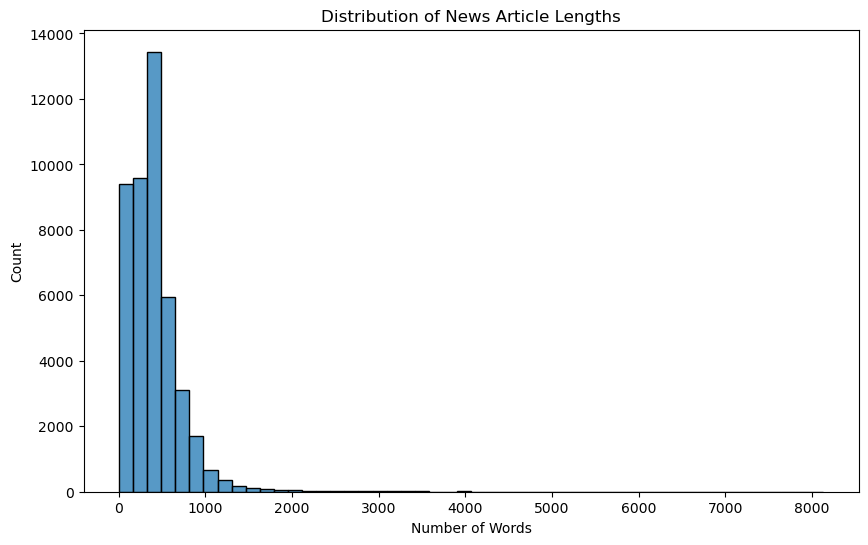

In [17]:
# Visualization of text length
plt.figure(figsize = (10,6))
sns.histplot(df["text_length"], bins=50)
plt.title("Distribution of News Article Lengths")
plt.xlabel("Number of Words")
plt.show()


### Length Comparision by class

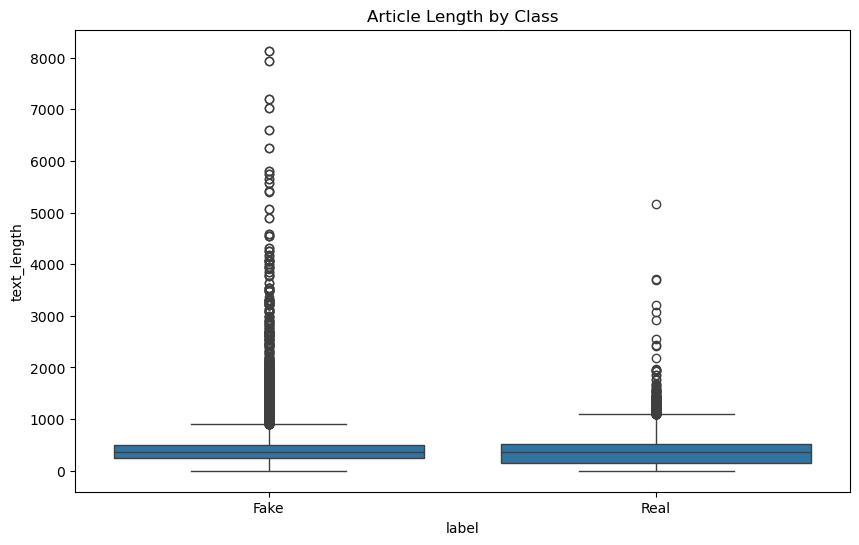

In [18]:
plt.figure(figsize = (10,6))
sns.boxplot(x="label", y="text_length", data=df)
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Article Length by Class")
plt.show()


### Cleaned text preview

In [19]:
from src.preprocessing import add_clean_text_column

df = add_clean_text_column(df)
df[["text", "clean_text"]].head()


,text,clean_text
0,"COX S BAZAR, Bangladesh/UNITED NATIONS (Reuter...",cox bazar bangladesh united nation reuters roh...
1,MILAN (Reuters) - Two wealthy regions of north...,milan reuters two wealthy region northern ital...
2,How many more symptoms need to be uncovered be...,many symptom need uncovered hillary come clean...
3,MOSCOW (Reuters) - Russia s ambassador to the ...,moscow reuters russia ambassador united nation...
4,So the Conway marriage just took a turn and ...,conway marriage took turn kellyanne still circ...


### Cleaned text length analysis

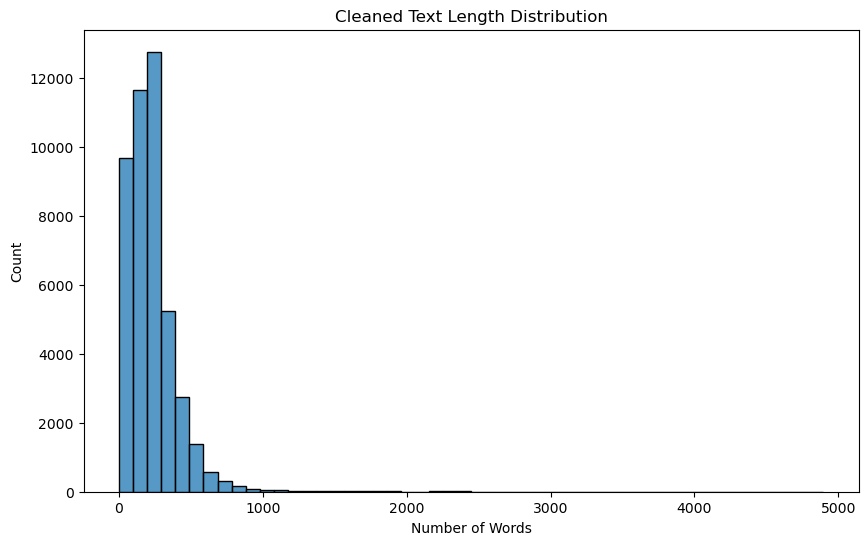

In [20]:
df["clean_text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.histplot(df["clean_text_length"], bins=50)
plt.title("Cleaned Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

### Most common words

In [22]:
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
common_words = Counter(all_words).most_common(20)

most_commmon_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
most_commmon_df


,Word,Frequency
0,trump,134814
1,said,132825
2,state,61344
3,president,57125
4,would,55171
5,people,42034
6,year,41696
7,republican,39763
8,one,39196
9,also,31374


## EDA Summary

- Fake and real news articles are fairly balanced.
- Text length varies significantly between classes.
- Cleaning reduces noise and standardizes input.
- Dataset is well suited for sequence-based deep learning models.